# Hiyerarşik Kümeleme

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv("USArrests.csv").copy()
df.index = df.iloc[:,0]
df = df.iloc[:,1:5]
# del df.index.name
df.head()

,Murder,Assault,UrbanPop,Rape
Unnamed: 0,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [3]:
from scipy.cluster.hierarchy import linkage
hc_complete = linkage(df, "complete")
hc_average = linkage(df, "average")
hc_single = linkage(df, "single")

In [4]:
dir(hc_complete)

['T',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_finalize__',
 '__array_function__',
 '__array_interface__',
 '__array_prepare__',
 '__array_priority__',
 '__array_struct__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__buffer__',
 '__class__',
 '__class_getitem__',
 '__complex__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__divmod__',
 '__dlpack__',
 '__dlpack_device__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__ilshift__',
 '__imatmul__',
 '__imod__',
 '__imul__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__irshift__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lshift__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__neg__',
 '

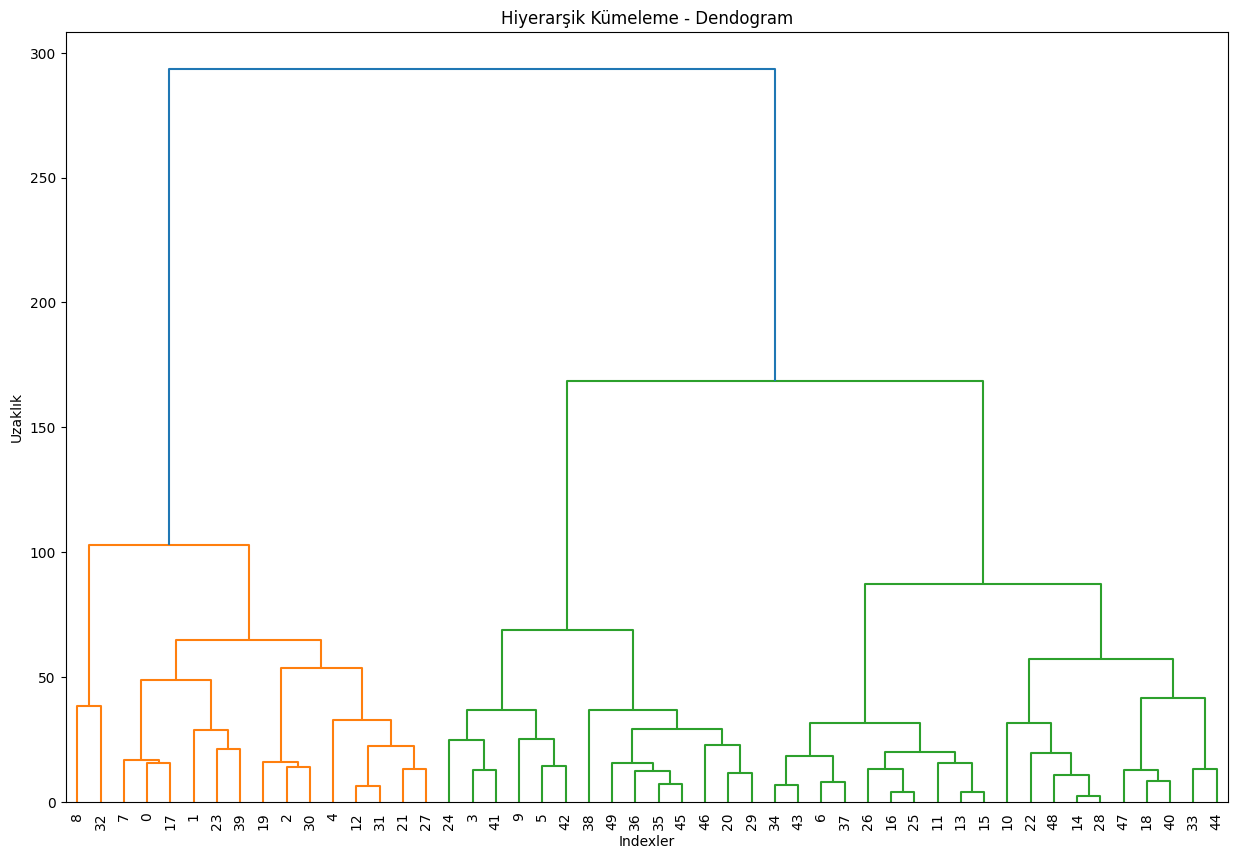

In [5]:
from scipy.cluster.hierarchy import dendrogram

plt.figure(figsize=(15, 10))
plt.title('Hiyerarşik Kümeleme - Dendogram')
plt.xlabel('Indexler')
plt.ylabel('Uzaklık')

dendrogram(
    hc_complete,
    leaf_font_size=10
);

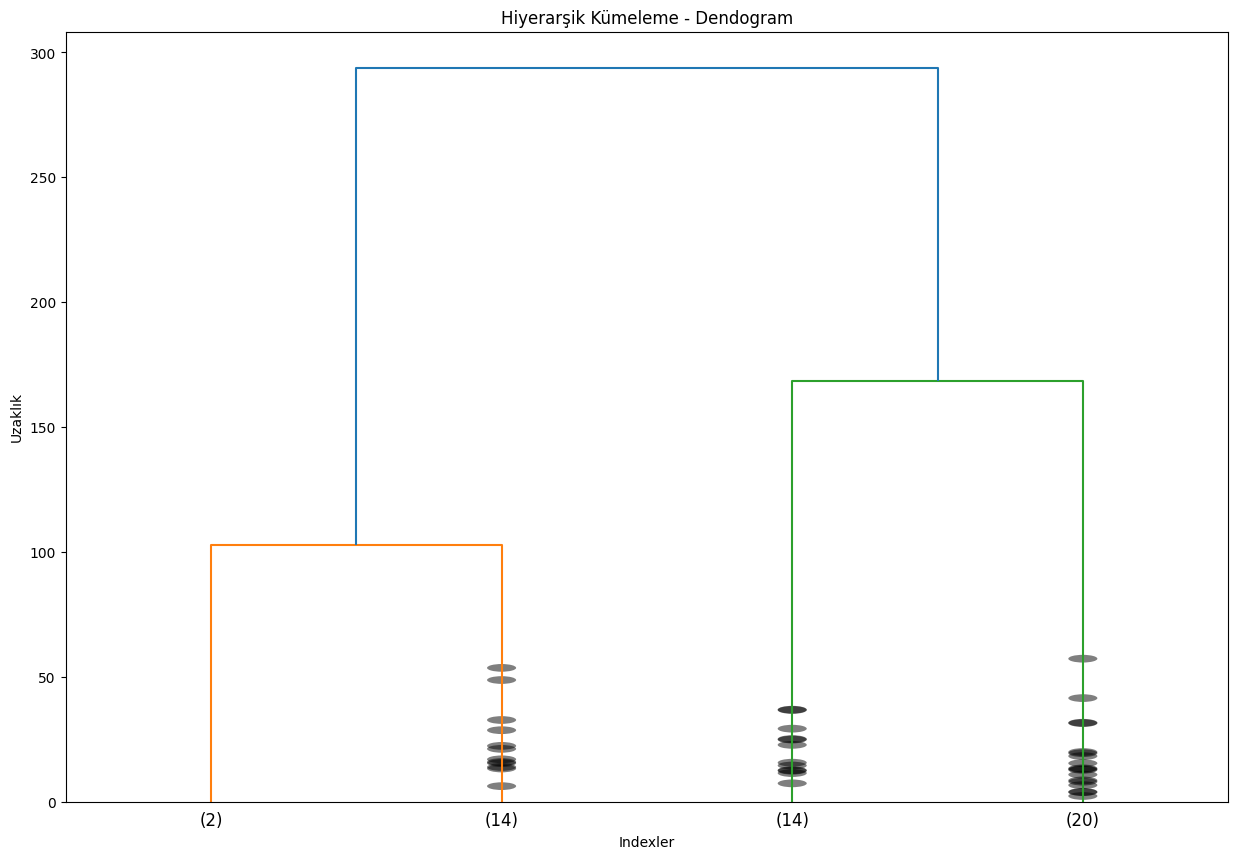

In [6]:
from scipy.cluster.hierarchy import dendrogram

plt.figure(figsize=(15, 10))
plt.title('Hiyerarşik Kümeleme - Dendogram')
plt.xlabel('Indexler')
plt.ylabel('Uzaklık')

dendrogram(
    hc_complete,
    truncate_mode = "lastp",
    p = 4,
    show_contracted = True
);

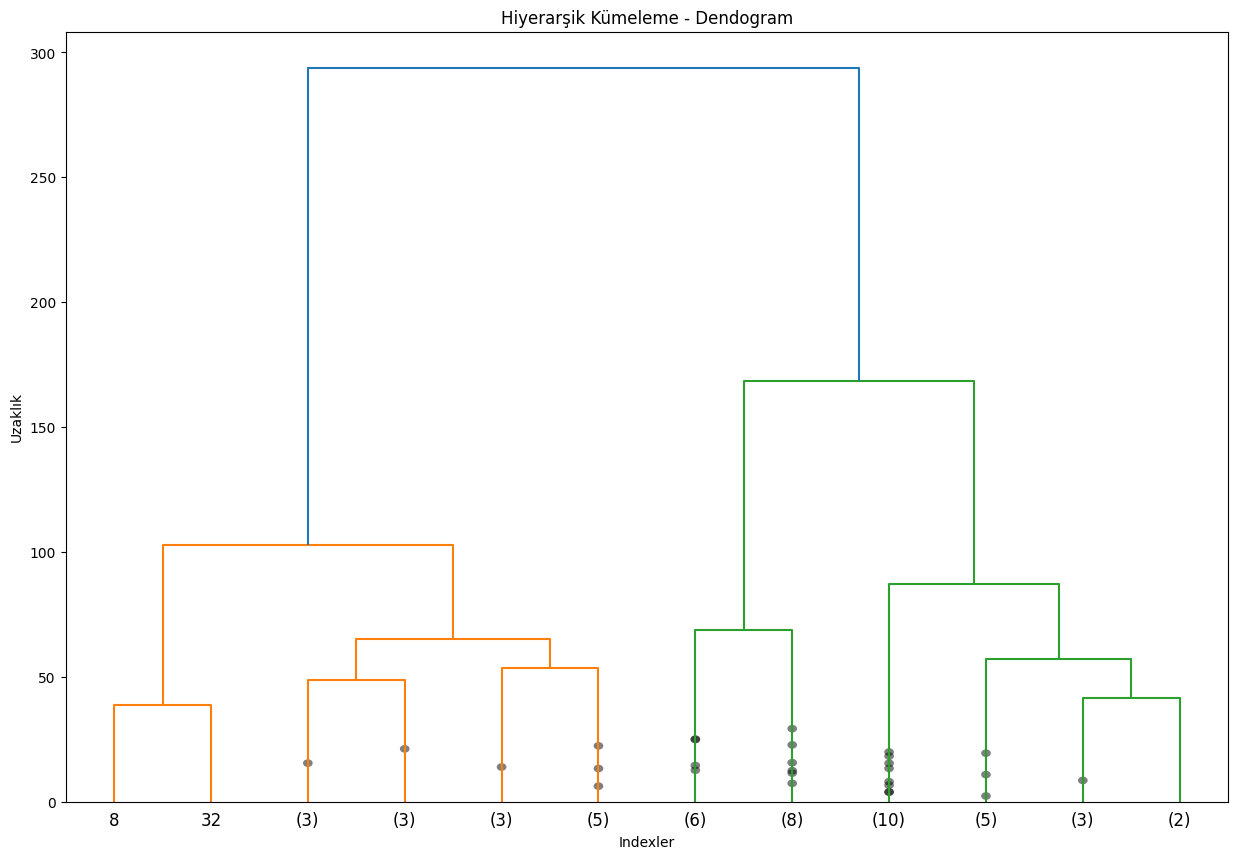

In [7]:
from scipy.cluster.hierarchy import dendrogram

plt.figure(figsize=(15, 10))
plt.title('Hiyerarşik Kümeleme - Dendogram')
plt.xlabel('Indexler')
plt.ylabel('Uzaklık')

dendrogram(
    hc_complete,
    truncate_mode = "lastp",
    p = 12,
    show_contracted = True
);

## Optimum Küme Sayısı

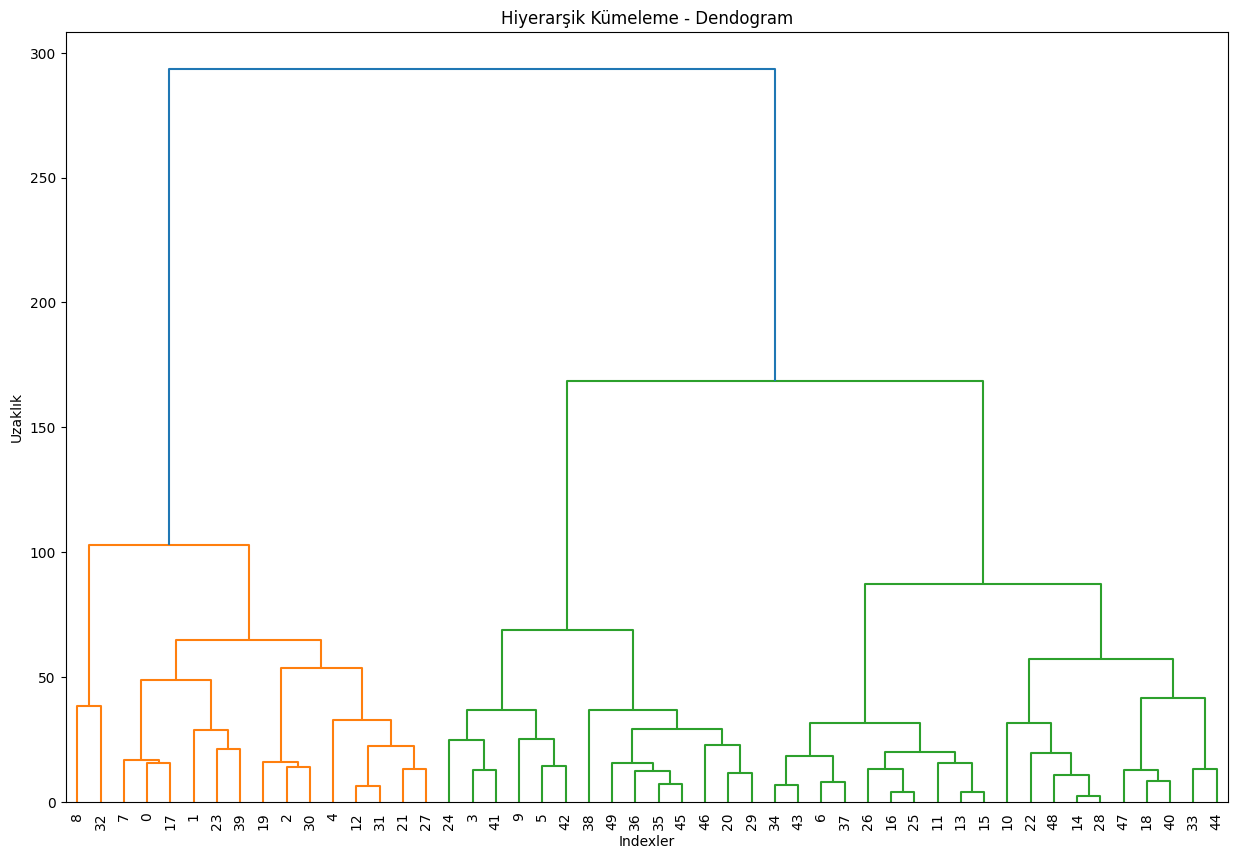

In [9]:
from scipy.cluster.hierarchy import dendrogram

plt.figure(figsize=(15, 10))
plt.title('Hiyerarşik Kümeleme - Dendogram')
plt.xlabel('Indexler')
plt.ylabel('Uzaklık')

den = dendrogram(
    hc_complete,
    leaf_font_size=10
);

In [13]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters = 4, 
                                  # affinity = "euclidean", => kullanım dışı bırakıldı (deprecated)
                                  linkage = "ward")

cluster.fit_predict(df)

array([0, 0, 0, 2, 0, 2, 3, 0, 0, 2, 1, 3, 0, 3, 1, 3, 3, 0, 1, 0, 2, 0,
       1, 0, 2, 3, 3, 0, 1, 2, 0, 0, 0, 1, 3, 2, 2, 3, 2, 0, 1, 2, 2, 3,
       1, 2, 2, 1, 1, 2], dtype=int64)

In [14]:
pd.DataFrame({"Eyaletler" : df.index, "Kumeler": cluster.fit_predict(df)})[0:10]

,Eyaletler,Kumeler
0,Alabama,0
1,Alaska,0
2,Arizona,0
3,Arkansas,2
4,California,0
5,Colorado,2
6,Connecticut,3
7,Delaware,0
8,Florida,0
9,Georgia,2


In [15]:
df["kume_no"] = cluster.fit_predict(df)

In [16]:
df.head()

,Murder,Assault,UrbanPop,Rape,kume_no
Unnamed: 0,,,,,
Alabama,13.2,236,58,21.2,0
Alaska,10.0,263,48,44.5,0
Arizona,8.1,294,80,31.0,0
Arkansas,8.8,190,50,19.5,2
California,9.0,276,91,40.6,0
